# tf.keras.layers.Flatten
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten

Flattens the input. Does not affect the batch size.

Inherits From: Layer, Operation

tf.keras.layers.Flatten(
    data_format=None, **kwargs
)

Args
data_format 	A string, one of "channels_last" (default) or "channels_first". The ordering of the dimensions in the inputs. "channels_last" corresponds to inputs with shape (batch, ..., channels) while "channels_first" corresponds to inputs with shape (batch, channels, ...). When unspecified, uses image_data_format value found in your Keras config file at ~/.keras/keras.json (if exists). Defaults to "channels_last". 

Attributes
input 	Retrieves the input tensor(s) of a symbolic operation.

Only returns the tensor(s) corresponding to the first time the operation was called.
output 	Retrieves the output tensor(s) of a layer.

Only returns the tensor(s) corresponding to the first time the operation was called. 

In [18]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
x = keras.Input(shape=(10, 64))
y = keras.layers.Flatten()(x)
y.shape

(None, 640)

## youtube: TensorFlow Keras Flatten Layer: Hands-On Coding
https://www.youtube.com/watch?v=efEGD1wsCnI&list=TLPQMTEwOTIwMjQ3StTKzmyfFw&index=2

In [15]:
image = [
    [0, 0, 0],
    [0, 255, 0],
    [0, 0, 0]   
]

In [16]:
image = tf.convert_to_tensor(image)
image

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[  0,   0,   0],
       [  0, 255,   0],
       [  0,   0,   0]])>

In [48]:
n_h, n_w = image.get_shape().as_list()
n_h

3

In [17]:
z = keras.layers.Flatten()(image)
z

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[  0,   0,   0],
       [  0, 255,   0],
       [  0,   0,   0]])>

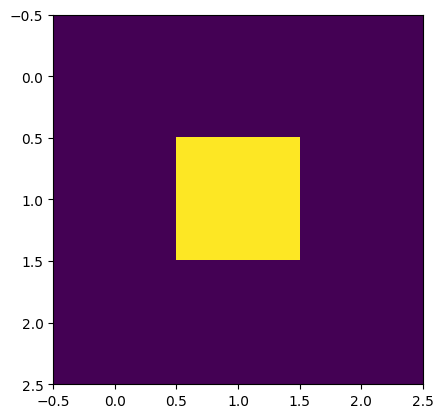

In [19]:
plt.imshow(image)

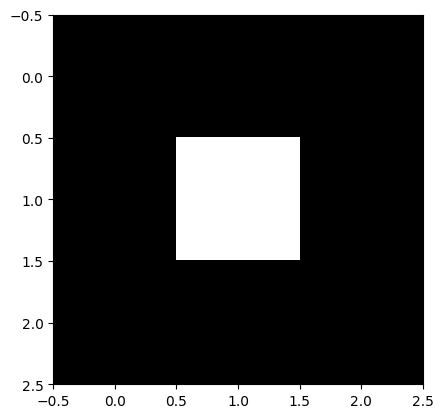

In [20]:
plt.imshow(image, cmap='gray')

In [25]:
step = 9
for i in range(9):
    print(int(255/(step - 1) * i))

0
31
63
95
127
159
191
223
255


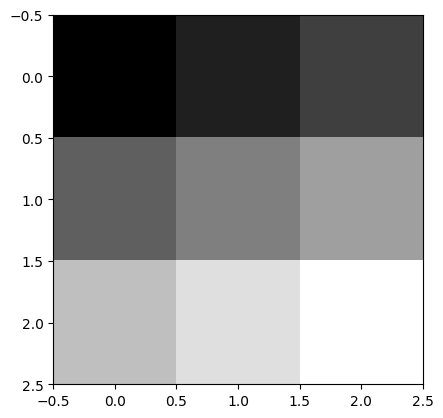

In [27]:
image = [
    [0, 31, 63],
    [95, 127, 159],
    [191, 223, 255]
]
image = tf.convert_to_tensor(image)

plt.imshow(image, cmap='gray')

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(3, 3), name='first_flattern')
], name='first_sequential')
model.summary()

d:\tutorials\python\python-tutorials\tutorial\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "first_sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ first_flattern (Flatten)        │ (None, 9)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
image.shape

TensorShape([3, 3])

In [38]:
image_batch = tf.expand_dims(image, [0])

In [41]:
output = model.predict(image_batch)
output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[  0.,  31.,  63.,  95., 127., 159., 191., 223., 255.]],
      dtype=float32)

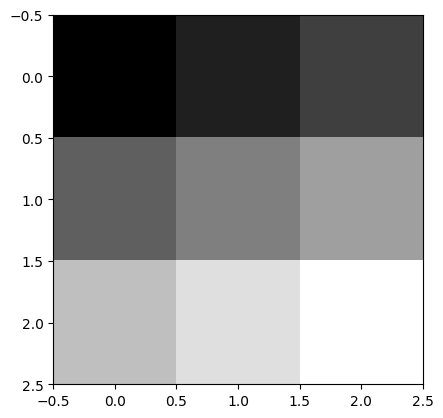

In [43]:
plt.imshow(image, cmap='gray')

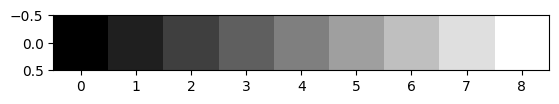

In [42]:
plt.imshow(output, cmap='gray')

In [45]:
model.summary()

Model: "first_sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ first_flattern (Flatten)        │ (None, 9)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## youtube: The Flatten Layer, Explained
https://www.youtube.com/watch?v=HmxHIUuVm60

WHY DO WE FLATTEN? The quick answer is because we want to convert images or other multi-dimensional data into one-dimensional linear tensors or vectors that can be used as inputs to the next layer of a neural network (say, artificial neural networks, or ANNs). In convolutional neural networks (CNNs), 'we flatten the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer. In other words, we put all the pixel data in one line and make connections with the final layer.' [1]

As mentioned by @WahranRai in a comment, flattening happens row by row starting from the top row and then going left to right through the cells of each row.

[ 1 ] [ 2 ] [ 3 ]
[ 4 ] [ 5 ] [ 6 ]  - - - - - - - › [ 1 ] [ 2 ] [ 3 ] [ 4 ] [ 5 ] [ 6 ] [ 7 ] [ 8 ] [ 9 ]
[ 7 ] [ 8 ] [ 9 ]

 References

[1] https://towardsdatascience.com/the-most-intuitive-and-easiest-guide-for-convolutional-neural-network-3607be47480
[2] https://medium.com/@PK_KwanG/cnn-step-2-flattening-50ee0af42e3e